In [4]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [5]:
# 数据读取
df_train = pd.read_csv('../datasets/train.csv')


In [6]:
# 输出所有变量名称
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# 对'SalePrice'做初步分析
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

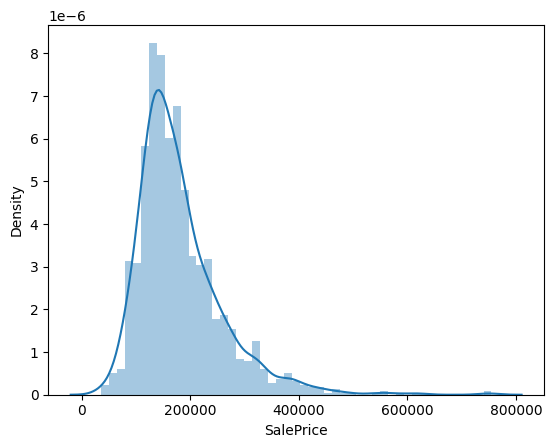

In [9]:
# 画图
sns.distplot(df_train['SalePrice']);

In [10]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


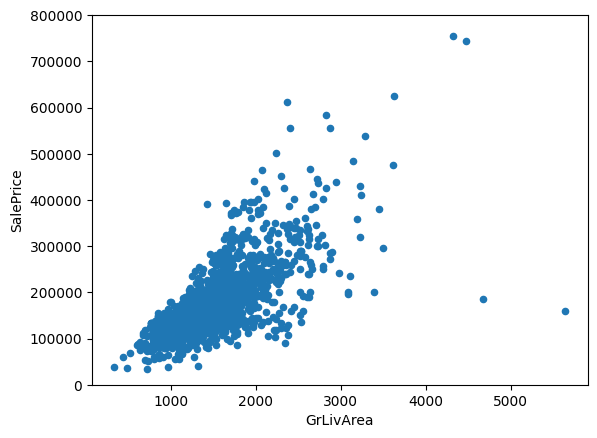

In [11]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

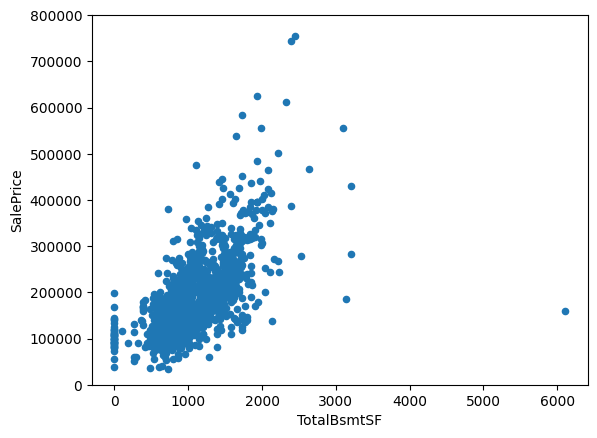

In [12]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

(-0.5, 9.5, 0.0, 800000.0)

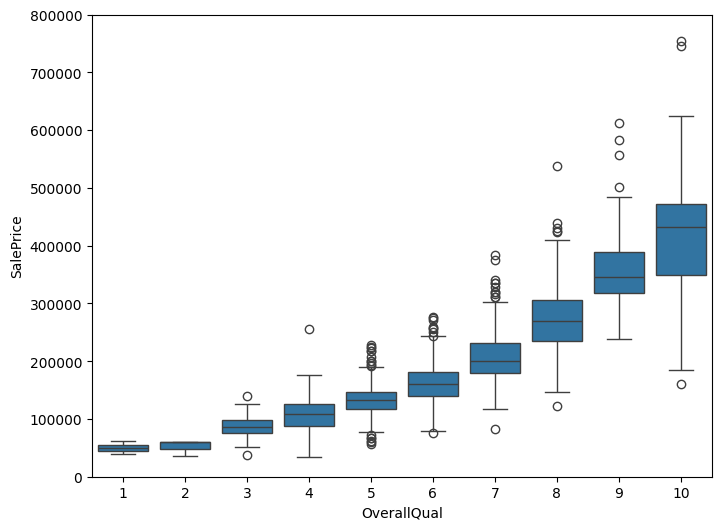

In [18]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

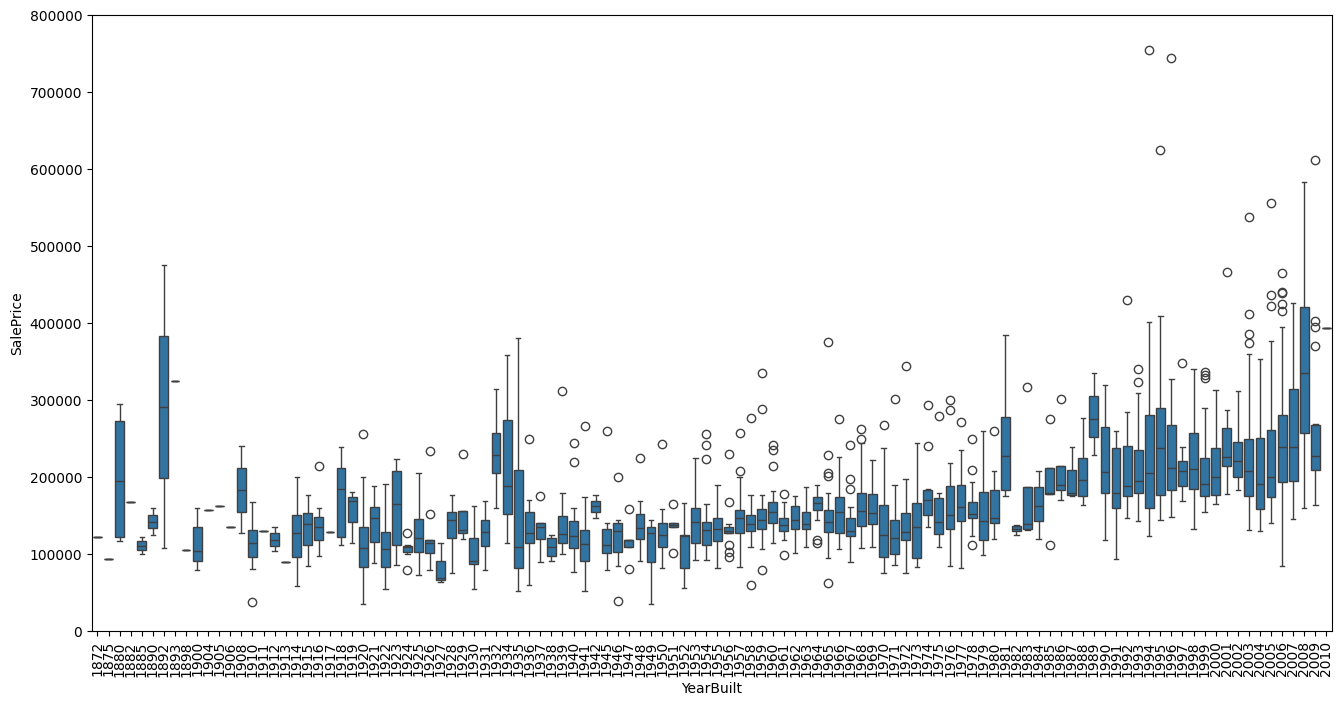

In [16]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

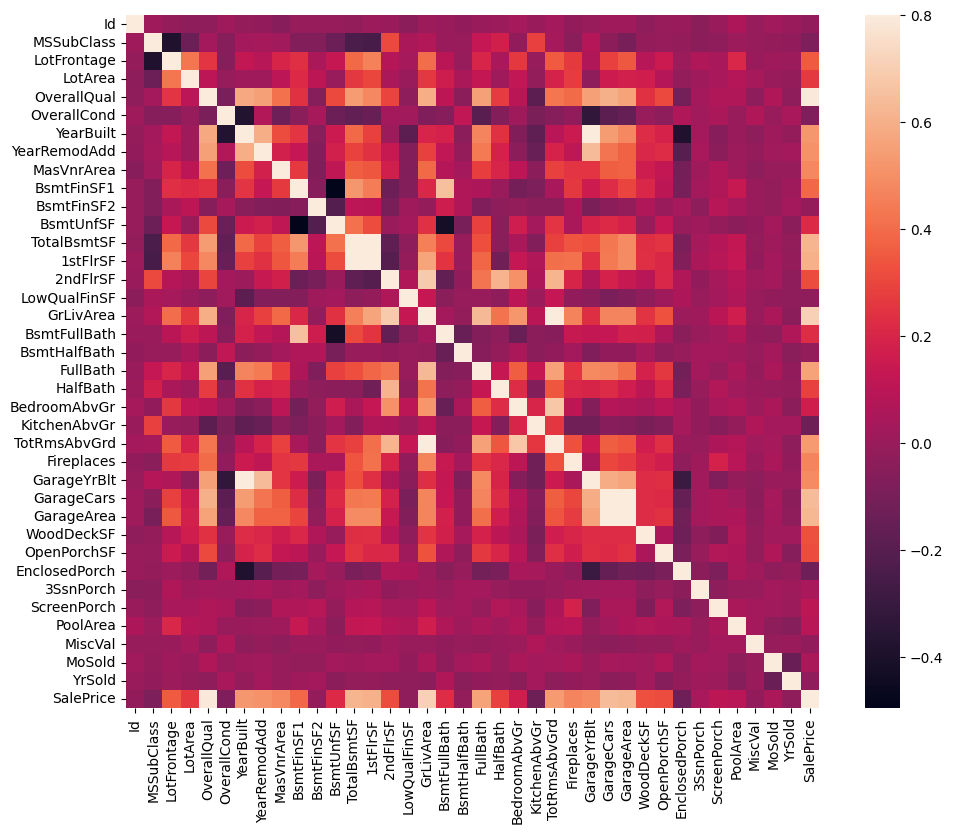

In [19]:
# 选择数值型列
numeric_data = df_train.select_dtypes(include=[float, int])

# 计算相关性矩阵
corrmat = numeric_data.corr()

# 绘制热图
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


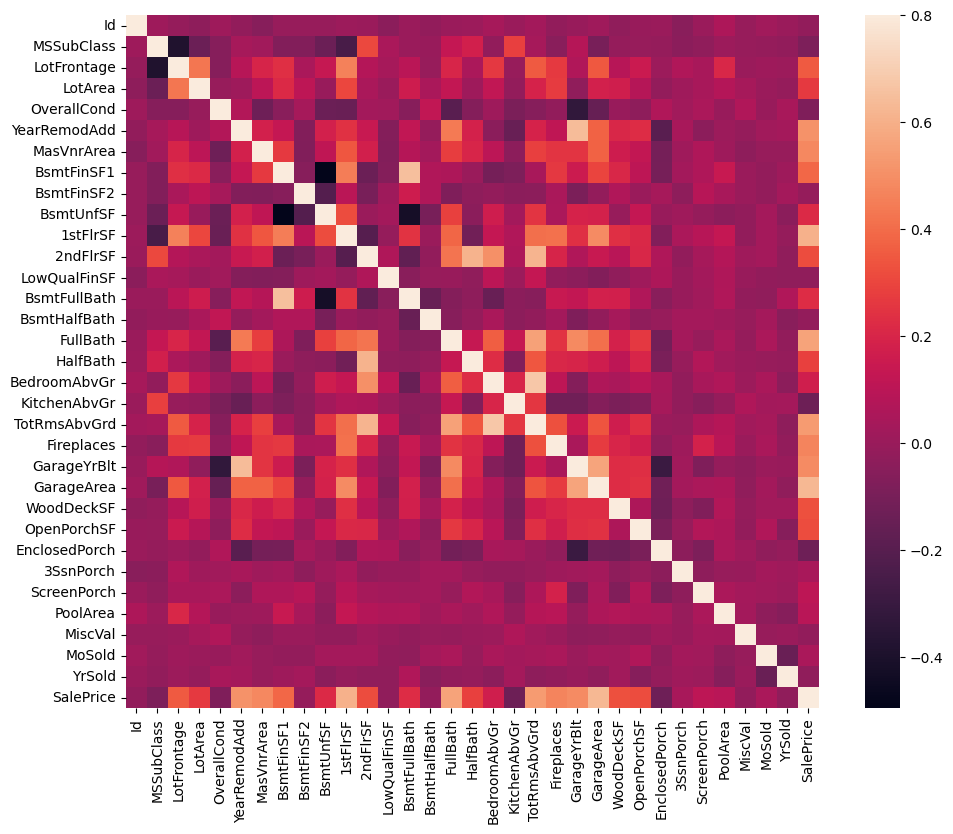

In [12]:
# 选择数值型列
numeric_data = df_train.select_dtypes(include=[float, int])

# 计算相关性矩阵
corrmat = numeric_data.corr()

# 找出相关性高于 0.7 的变量对
high_corr_pairs = set()
threshold = 0.7

# 遍历相关性矩阵，找到高相关的列对
for i in range(len(corrmat.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > threshold:
            high_corr_pairs.add((corrmat.columns[i], corrmat.columns[j]))

# 创建一个新数据框，并删除高度相关的变量，只保留一个
columns_to_drop = set()
for pair in high_corr_pairs:
    # 选择保留第一个变量，删除第二个变量（也可以根据需要选择保留哪个）
    columns_to_drop.add(pair[1])

# 删除高度相关的变量
reduced_data = numeric_data.drop(columns=columns_to_drop)

# 绘制去除高相关性的变量后的相关性热图
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(reduced_data.corr(), vmax=.8, square=True)
plt.show()

# 保存处理后的数据为CSV文件
output_path_reduced = '../datasets/reduced_train_data.csv'
reduced_data.to_csv(output_path_reduced, index=False)


In [20]:
# 查找缺失值列
missing_data = df_train.isnull().sum().to_frame(name='Total')
missing_data['Percentage'] = (missing_data['Total'] / df_train.shape[0]) * 100
missing_data = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

# 删除缺失值较多的列（假设缺失值总数大于1的列为较多的列）
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)

# 删除 'Electrical' 列中有缺失值的行
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

# 对缺失值较少的列进行处理
# 对数值型列使用均值填充，对非数值型（如分类变量）使用众数填充
for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:  # 检查是否还有缺失值
        if df_train[col].dtype in ['float64', 'int64']:  # 数值型列
            df_train[col].fillna(df_train[col].mean(), inplace=True)
        else:  # 非数值型列
            df_train[col].fillna(df_train[col].mode()[0], inplace=True)

# 检查是否还有缺失值
max_missing = df_train.isnull().sum().max()

# 打印输出文件路径和最大缺失值
print(f"最大缺失值剩余数量: {max_missing}")


最大缺失值剩余数量: 0


In [21]:
df = df_train.copy()

# 选择数值型列
numeric_df = df.select_dtypes(include=[float, int])

# 计算相关性矩阵
corrmat = numeric_df.corr()

# 筛选与SalePrice相关性最高的12个变量
top_12_corr = corrmat['SalePrice'].abs().nlargest(12)

# 提取相关列数据
top_12_columns = top_12_corr.index
filtered_data = df[top_12_columns]


In [1]:
data = filtered_data.copy()

# 随机打乱数据
shuffled_data = filtered_data.sample(frac=1, random_state=42).reset_index(drop=True)
train_size = int(len(shuffled_data) * 0.8)

# 按顺序分割数据
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# 保存训练集和测试集，保留题头
train_data.to_csv("../results/train_data.csv", index=False, header=True)
test_data.to_csv("../results/test_data.csv", index=False, header=True)

print("训练集数据已保存到 train_data.csv")
print("测试集数据已保存到 test_data.csv")
print("训练集的行数:", train_data.shape[0])
print("测试集的行数:", test_data.shape[0])


NameError: name 'filtered_data' is not defined